# only compare online or pseudo-online performance

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext snakeviz
import pickle
import pandas as pd 
from pyneurode.spike_sorter import *
import sys
sys.path.append('..\\spikeforest_comparison')
sys.path.append('..\\')


import spikeinterface as si
import spikeinterface.comparison as sc
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.toolkit as st
import spikeinterface.widgets as sw
from tqdm import tqdm
import seaborn as sns 

### Loading previously detected spikes

In [3]:
# load previous collected spikes
print('Loading spike data')
# path = 'D:\Documents\GitHub\spikeforest_comparison\data\df_sort_M1_D20_45_th5.pkl'
path = '../data/df_sort_M1_D20_45_th5.pkl'
with open(path,'rb') as f:
    df_list = pickle.load(f)

df = pd.concat(df_list)   
df.reset_index() #make sure no index has duplicates

# Save the online cluster id to another column
df.rename(columns={'cluster_id':'cluster_id_online'},inplace=True)
# df

Loading spike data


### Clusting-TM split

In [5]:

# %% Sorting spikes
print('Sorting spikes')
training_spikes = 20000
df_sort = df.loc[:, ['spike_waveform','time','electrode_ids','channel_ids','spike_id','timestamps','acq_timestamps']] # remove other columns

# train template
df_train,pca_transformer,standard_scalers = sort_all_electrodes(df_sort.iloc[:training_spikes].copy(), pca_component=3, verbose=True) #sort spikes

(templates, template_cluster_id, template_electrode_id) = generate_spike_templates(df_train)
print(f'Number of template {len(templates)}')

# template match all subsequent neurons
df_sortc = df_sort.copy()

Sorting spikes
Aligning spikes
Sorting electrode 1
use normalized pc
Sorting electrode 2
use normalized pc
Sorting electrode 0
use normalized pc
Sorting electrode 3
use normalized pc
Number of template 14


### Measure performance

In [13]:
%timeit df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

6.93 s ± 48.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id, pca_transformer, standard_scalers)

In [8]:
%timeit df_matched = template_match_all_electrodes(df_sortc, templates, template_electrode_id, template_cluster_id,pca_transformer, standard_scalers)

16.6 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
sorted_df = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)
sorted_df

,spike_waveform,time,electrode_ids,channel_ids,spike_id,timestamps,acq_timestamps,cluster_id,spike_waveform_aligned,sorting_time
0,"[-0.05250948, -0.14332052, -0.022488609, 0.048...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,375862,1.615648e+09,C1_5,"[0.048003923147916794, -0.21444782614707947, -...",0.000327
1,"[-0.5246422, -0.609553, -0.35305232, -0.039588...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,376256,1.615648e+09,C1_2,"[-0.039588578045368195, -0.12017491459846497, ...",0.000112
2,"[-0.45728362, 0.3922822, 0.60337937, 0.3992793...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,376899,1.615648e+09,C1_3,"[0.3992793560028076, -0.10937236249446869, -0....",0.000096
3,"[0.46189496, 1.5869086, 1.8508329, 1.4992404, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,377838,1.615648e+09,C2_1,"[1.4992403984069824, 1.132098913192749, 0.6527...",0.000094
4,"[0.909833, 0.2761541, 0.17282563, 0.516779, 1....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,377887,1.615648e+09,C1_2,"[0.5167790055274963, 1.1071397066116333, 1.749...",0.000096
...,...,...,...,...,...,...,...,...,...,...
10,"[0.06949595, 0.29736862, 0.81068987, 1.116027,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10,9118576,1.615648e+09,C0_3,"[1.1160269975662231, 0.888058602809906, 0.3635...",0.000080
11,"[0.16372728, -0.009656481, 0.16306406, -0.3709...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,9118598,1.615648e+09,C2_2,"[-0.3709728717803955, -1.4567493200302124, -1....",0.000082
12,"[-0.8042053, -0.5876875, 0.13034075, 0.6422738...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12,9118667,1.615648e+09,C1_5,"[0.6422738432884216, 0.7085359692573547, 0.359...",0.000082
13,"[-0.020245934, 1.4837929, 1.8430108, 1.3749459...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,9118788,1.615648e+09,C3_1,"[1.374945878982544, 0.7906058430671692, 0.8324...",0.000082


<AxesSubplot:xlabel='sorting_time', ylabel='Count'>

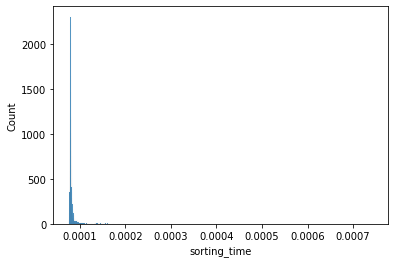

In [22]:
# sorted_df.sorting_time.hist(bins=100)
sns.histplot(x='sorting_time',data=sorted_df)

In [20]:
t = sorted_df.sorting_time.mean()

1/t/50

233.23666158895477

In [19]:
t

8.574981250266329e-05

In [9]:
%snakeviz template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

 
*** Profile stats marshalled to file 'C:\\Users\\teristam\\AppData\\Local\\Temp\\tmplr5mcl1d'. 
Embedding SnakeViz in this document...


In [5]:
len(df_sortc)

46934

In [8]:
time_per_spike = 8/46934
print(time_per_spike)

1/time_per_spike/100

0.0001704521242595986


58.6675